<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Exploring climate data and dengue trend in Singapore

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

- Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

- Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

- Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Raw Datasets

**Datasets provided**
* [`rainfall-monthly-number-of-rain-days.csv`](../data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](../data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022. 
* [`rainfall-monthly-highest-daily-total.csv`](../data/rainfall-monthly-highest-daily-total.csv): Monthly highest daily rain recorded in mm(millimeters) from 1982 to 2022. [Source: [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)]
* [`wet-bulb-temperature-hourly.csv`](../data/wet-bulb-temperature-hourly.csv): Hourly wet bulb temperature from 1982 to 2022. [Source: [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)] 
* [`relative-humidity-monthly-mean.csv`](../data/relative-humidity-monthly-mean.csv): Monthly mean humidity from 1982 to 2022. [Source: [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)]
* [`surface-air-temperature-monthly-mean.csv`](../data/surface-air-temperature-monthly-mean.csv): Monthly mean surface air temperature from 1982 to 2022. [Source: [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)]

**Other relevant datasets**
* [`disease.csv`](../data/disease.csv): Yearly number of notiable diseases from 1966 to 2021. Dengue/DHF was made a notifiable disease from August 1977. However it was administratively notifiable within government institutions since October 1966. [Source: [Department of Statistics Singapore](https://tablebuilder.singstat.gov.sg/table/TS/M870081)]
* [`weekly-number-of-dengue-cases.csv`](../data/weekly-number-of-dengue-cases/weekly-number-of-dengue-and-dengue-haemorrhagic-fever-cases.csv): Weekly number of lab-confirmed dengue and dengue haemorrhagic fever cases from 2014 to 2018 [Source: [Data.gov.sg](https://data.gov.sg/dataset/weekly-number-of-dengue-and-dengue-haemorrhagic-fever-cases)]

## Problem Statement

Dengue is one of the top endemic diseases in Singapore and it has reached new highs in incidence and death rates in recent years [[1]](#1) [[2]](#2). With Singapore having a generally wet and hot climate, and rainfall being one of the main drivers of dengue transmission [[3]](#3) [[4]](#4), this project aims to provide an exploratory analysis on rainfall data and number of dengue cases to improve resource allocation and preventive measures, hence reducing public resource overload.

### Outside Research

Global climate change bringing about higher mean temperatures and cumulative precipitation may potentially increase the burden of dengue fever infection in near future [5]. In recent times, Singapore had already experienced the effects of climate change, where heat stress, intense rainfall, urban heat island effect and extreme weather patterns could be observed [6]. Unfortunately, dengue transmission could be exacerbated such weather conditions as well. It has been a significant public health concern in Singapore, impacting the population's health and well-being. The country has experienced periodic outbreaks of dengue fever, with varying intensities and geographical spread. In just 2022, 19 dengue deaths were recorded, which is 4 times the death toll from the preceding year [2]. While rainfall that brings about stagnant water are breeding ground for mosquitoes, excess rainfall would be disruptive to their reproductive cycle [4]. Hence, by observing dengue-rainfall trends, it enables health authorities to implement targeted prevention and control measures.

### References

[1] https://www.nmrc.gov.sg/docs/default-source/about-us-library/idtf-summary-report.p
[2] https://www.straitstimes.com/singapore/health/singapore-records-19-dengue-deaths-in-2022-nearly-four-times-2021-s-toll
[3] https://www.metoffice.gov.uk/weather/travel/holiday-weather/asia/singapore
[4] https://journals.plos.org/plosntds/article?id=10.1371/journal.pntd.0006935
    
[5] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2799326/
    [6] https://energytracker.asia/climate-change-singapore/

### Coding Challenges

1. Manually calculate mean:

In [38]:
def num_mean(nums):
    count = 0
    total = 0
    for num in nums:
        if num is not None and not (num != num): # null values do not equate to themselves, hence a null num will not equate to a null num
            count += 1
            total += num
    if count > 0:
        return total / count
    else:
        return 0 
numbers = [2,5,3,2,34,5,None]
num_mean(numbers)

8.5

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

In [39]:
def stdv(nums):
    n = 0  # counter
    total = 0
    non_nan_nums = []
    for num in nums:
        if num is not None and not (num != num):
            non_nan_nums.append(num)
            n += 1
            total += (num - num_mean(nums)) ** 2

    if n > 0:
        return (total / n) ** 0.5
    else:
        return 0  # Handle the case when there are no valid numbers
    
stdv(numbers)

11.470977871713176

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

In [40]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import calendar

## Data Import and Cleaning

### Data Import & Cleaning

Importing all the datasets that I have selected for this project and going through through the following steps (not be in sequence). 
1. Display the data.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since most of the different climate metrics are in month format, they are merged into one single dataframe for easier analysis
10. Additional cleaning.
11. Save the cleaned and merged dataframes as csv files.

**Importing the rainfall data (monthly data)**

In [41]:
# Checking content and datatypes

rain_highest_daily = '../data/rainfall-monthly-highest-daily-total.csv'
high_df = pd.read_csv(rain_highest_daily)
display(high_df.head(5))
print(high_df.info())

rain_days = '../data/rainfall-monthly-number-of-rain-days.csv'
day_df = pd.read_csv(rain_days)
display(day_df.head(5))
print(day_df.info())

rain_monthly_total = '../data/rainfall-monthly-total.csv'
total_df = pd.read_csv(rain_monthly_total)
display(total_df.head(5))
print(day_df.info())

,month,maximum_rainfall_in_a_day
0,1982-01,36.5
1,1982-02,9.4
2,1982-03,61.7
3,1982-04,45.1
4,1982-05,33.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      491 non-null    object 
 1   maximum_rainfall_in_a_day  491 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB
None


,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB
None


,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB
None


In [42]:
# Standardising the date column

high_df['month'] =pd.to_datetime(  high_df['month'] )
day_df['month'] =pd.to_datetime(  day_df['month'] )
total_df['month'] =pd.to_datetime(  total_df['month'] )

In [43]:
# Merging rain datasets together

rain_df = pd.merge(high_df, day_df, on = 'month', how='outer')
rain_df = pd.merge(rain_df, total_df, on = 'month', how='outer')

rain_df = rain_df.set_index('month')
rain_df.index.names = ['date']

display(rain_df)

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall
date,,,
1982-01-01,36.5,10.0,107.1
1982-02-01,9.4,5.0,27.8
1982-03-01,61.7,11.0,160.8
1982-04-01,45.1,14.0,157.0
1982-05-01,33.0,10.0,102.2
...,...,...,...
2022-07-01,27.8,16.0,145.2
2022-08-01,32.4,15.0,141.4
2022-09-01,38.2,NaN,NaN


**Importing other weather-related datasets**

In [44]:
# Importing temperature data
wet_bulb_temperature_hourly = '../data/wet-bulb-temperature-hourly.csv'
bulb_temp_df = pd.read_csv(wet_bulb_temperature_hourly)

# Standardising the datetime column
bulb_temp_df['wbt_date'] =pd.to_datetime(  bulb_temp_df['wbt_date'] )
bulb_temp_df = bulb_temp_df.set_index('wbt_date')
bulb_temp_df = bulb_temp_df.rename(columns={'wet_bulb_temperature':'wbt'})
bulb_temp_df.index.names = ['date']

# Grouping by month as such granular data is not needed, and to standardise with weather data
bulb_temp_df = bulb_temp_df.groupby(bulb_temp_df.index.strftime('%Y-%m-01')).agg({'wbt': ['mean', 'min', 'max']})
bulb_temp_df.columns = ['_'.join(col) for col in bulb_temp_df.columns.values]
bulb_temp_df.index =pd.to_datetime( bulb_temp_df.index )
display(bulb_temp_df)

,wbt_mean,wbt_min,wbt_max
date,,,
1982-01-01,23.456048,21.3,25.6
1982-02-01,24.297619,22.4,26.8
1982-03-01,24.811559,22.4,27.4
1982-04-01,25.103750,22.2,27.6
1982-05-01,25.689651,22.7,28.1
...,...,...,...
2022-07-01,25.439113,22.2,27.4
2022-08-01,25.072312,23.0,28.6
2022-09-01,24.833889,15.3,27.3


In [45]:
# Importing humidity data
humidity = '../data/relative-humidity-monthly-mean.csv'
humidity_df = pd.read_csv(humidity)
display(humidity_df.head(5))

# Importing surface air temperature data
sa_temp = '../data/surface-air-temperature-monthly-mean.csv'
sa_temp_df = pd.read_csv(sa_temp)
display(sa_temp_df.head(5))

# Merge and standardise date index
hs_df = pd.merge(humidity_df, sa_temp_df, on = 'month', how='outer')
hs_df['month'] =pd.to_datetime(  hs_df['month'] )
hs_df = hs_df.set_index('month')
hs_df.index.names = ['date']
print(hs_df.info())
display(hs_df.head(5))

,month,mean_rh
0,1982-01,81.2
1,1982-02,79.5
2,1982-03,82.3
3,1982-04,85.9
4,1982-05,83.2


,month,mean_temp
0,1982-01,25.9
1,1982-02,27.1
2,1982-03,27.2
3,1982-04,27.0
4,1982-05,28.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 491 entries, 1982-01-01 to 2022-11-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mean_rh    491 non-null    float64
 1   mean_temp  491 non-null    float64
dtypes: float64(2)
memory usage: 11.5 KB
None


,mean_rh,mean_temp
date,,
1982-01-01,81.2,25.9
1982-02-01,79.5,27.1
1982-03-01,82.3,27.2
1982-04-01,85.9,27.0
1982-05-01,83.2,28.0


In [46]:
# Merging all weather datasets together

weather_df = pd.concat([rain_df,bulb_temp_df], axis=1, join='outer')
weather_df = pd.concat([weather_df,hs_df], axis=1, join='outer')
display(weather_df)

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,wbt_mean,wbt_min,wbt_max,mean_rh,mean_temp
date,,,,,,,,
1982-01-01,36.5,10.0,107.1,23.456048,21.3,25.6,81.2,25.9
1982-02-01,9.4,5.0,27.8,24.297619,22.4,26.8,79.5,27.1
1982-03-01,61.7,11.0,160.8,24.811559,22.4,27.4,82.3,27.2
1982-04-01,45.1,14.0,157.0,25.103750,22.2,27.6,85.9,27.0
1982-05-01,33.0,10.0,102.2,25.689651,22.7,28.1,83.2,28.0
...,...,...,...,...,...,...,...,...
2022-07-01,27.8,16.0,145.2,25.439113,22.2,27.4,76.8,28.6
2022-08-01,32.4,15.0,141.4,25.072312,23.0,28.6,77.4,28.1
2022-09-01,38.2,NaN,NaN,24.833889,15.3,27.3,76.9,27.9


All weather data has been imported. Next, we will import the dengue datasets.

**Importing dengue dataset (Yearly data 1966-2021)**

In [47]:
#Importing and cleaning data

disease = '../data/disease.csv'
disease_yearly_df = pd.read_csv(disease)
display(disease_yearly_df.head(5))

# Change table format into weather dataset format
disease_yearly_df = disease_yearly_df.transpose()
disease_yearly_df.rename(disease_yearly_df.iloc[0,:], axis = 1, inplace = True) # Name the column titles properly
disease_yearly_df = disease_yearly_df.tail(-1) # Remove first row
disease_yearly_df.rename_axis('date', inplace = True) 

# Extract the useful data (dengue) and make sure the datatype is correct (integers) 
df_dengue_yearly = disease_yearly_df[['Dengue/DHF']]
df_dengue_yearly['Dengue/DHF'] = df_dengue_yearly['Dengue/DHF'].astype(int)

# print(df_dengue_yearly.info())

# df_dengue_yearly.reset_index(inplace=True)
# df_dengue_yearly.set_index('date', inplace=True)
df_dengue_yearly = df_dengue_yearly.rename(columns={'Dengue/DHF': 'dengue_cases'} )
df_dengue_yearly.sort_index( inplace=True)

display(df_dengue_yearly.head())

,Data Series,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1975,1974,1973,1972,1971,1970,1969,1968,1967,1966
0,Dengue/DHF,5261,35266,15979,3283,2767,13085,11294,18326,22170,...,59,229,1255,12,19,32,60,158,355,162
1,Malaria,2,13,33,35,39,31,47,62,111,...,443,417,347,302,357,473,302,396,228,216
2,Enteric Fever,20,40,85,59,81,70,76,77,107,...,513,301,154,167,224,158,237,134,93,124
3,Viral Hepatitis,99,141,161,193,217,193,207,194,202,...,na,na,na,na,na,na,na,na,na,na
4,Cholera,3,0,2,2,3,2,3,2,2,...,10,8,1,114,0,1,10,6,0,0


C:\Users\jinji\AppData\Local\Temp\ipykernel_4352\3229801337.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dengue_yearly['Dengue/DHF'] = df_dengue_yearly['Dengue/DHF'].astype(int)


,dengue_cases
date,
1966,162
1967,355
1968,158
1969,60
1970,32


**Preparing yearly master dataset**

This dengue dataset covers the longest duration but it contains only a **yearly** total of dengue cases. Hence, I will aggregate the weather data as well for a yearly overview.

In [48]:
display(weather_df.head())

# Aggregating weather_df values
weather_df_year = weather_df.groupby(weather_df.index.year).agg({'maximum_rainfall_in_a_day': ['max'], 
                                 'no_of_rainy_days': ['sum'],
                                  'total_rainfall': ['sum'],
                                  'mean_rh': ['mean'],
                                  'mean_temp': ['mean'],    
                                 })
weather_df_year.columns  = ['_'.join(col) for col in weather_df_year.columns.values]
display(weather_df_year.head())

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,wbt_mean,wbt_min,wbt_max,mean_rh,mean_temp
date,,,,,,,,
1982-01-01,36.5,10.0,107.1,23.456048,21.3,25.6,81.2,25.9
1982-02-01,9.4,5.0,27.8,24.297619,22.4,26.8,79.5,27.1
1982-03-01,61.7,11.0,160.8,24.811559,22.4,27.4,82.3,27.2
1982-04-01,45.1,14.0,157.0,25.103750,22.2,27.6,85.9,27.0
1982-05-01,33.0,10.0,102.2,25.689651,22.7,28.1,83.2,28.0


,maximum_rainfall_in_a_day_max,no_of_rainy_days_sum,total_rainfall_sum,mean_rh_mean,mean_temp_mean
date,,,,,
1982,109.0,130.0,1581.7,81.966667,27.358333
1983,181.8,145.0,1993.7,82.283333,27.666667
1984,154.4,191.0,2686.7,84.616667,26.766667
1985,86.8,181.0,1483.9,83.208333,27.116667
1986,131.7,174.0,2536.1,82.866667,27.100000


In [49]:
# Merge dengue and dengue weather by year, and remove null data

df_year = pd.merge(weather_df_year, df_dengue_yearly, left_index = True, right_index=True, how = 'left')
print(df_year.info())
df_year.dropna(inplace=True)
print(df_year.info())

display(df_year.head())

df_year.rename(columns={'Dengue/DHF': 'dengue_cases', # can keep
                        'maximum_rainfall_in_a_day_max': 'max_monthly_max_rainfall', # can keep
                        'no_of_rainy_days_sum': 'total_rday', # can keep
                        'total_rainfall_sum': 'total_rainfall', # can keep
                        'mean_rh_mean': 'rh_mean',# can keep
                        'mean_temp_mean': 'temp_mean' # can keep
                        },
               inplace=True)
df_year = pd.concat((df_year['dengue_cases'],df_year.iloc[:,:-1]), axis =1)
display(df_year.head())

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 1982 to 2022
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   maximum_rainfall_in_a_day_max  41 non-null     float64
 1   no_of_rainy_days_sum           41 non-null     float64
 2   total_rainfall_sum             41 non-null     float64
 3   mean_rh_mean                   41 non-null     float64
 4   mean_temp_mean                 41 non-null     float64
 5   dengue_cases                   0 non-null      float64
dtypes: float64(6)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   maximum_rainfall_in_a_day_max  0 non-null      float64
 1   no_of_rainy_days_sum           0 non-null      float64
 2   total_rainfall_sum             0 non-nul

,maximum_rainfall_in_a_day_max,no_of_rainy_days_sum,total_rainfall_sum,mean_rh_mean,mean_temp_mean,dengue_cases
date,,,,,,


,dengue_cases,max_monthly_max_rainfall,total_rday,total_rainfall,rh_mean,temp_mean
date,,,,,,


In [50]:
df_year.head()

,dengue_cases,max_monthly_max_rainfall,total_rday,total_rainfall,rh_mean,temp_mean
date,,,,,,


**Importing dengue dataset (Weekly data 2014-2018)**

In [51]:
#Importing and cleaning data

weekly_dengue = '../data/weekly-number-of-dengue-cases/weekly-number-of-dengue-and-dengue-haemorrhagic-fever-cases.csv'
weekly_dengue_df = pd.read_csv(weekly_dengue)
display(weekly_dengue_df)
print(weekly_dengue_df.info())

,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0
...,...,...,...,...
525,2018,51,DHF,1.0
526,2018,52,Dengue,160.0
527,2018,52,DHF,0.0
528,2018,53,Dengue,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         530 non-null    int64  
 1   eweek        530 non-null    int64  
 2   type_dengue  530 non-null    object 
 3   number       522 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 16.7+ KB
None


In [52]:
# Convert 'year' and 'eweek' columns to datetime
weekly_dengue_df['date'] = pd.to_datetime(weekly_dengue_df['year'].astype(str) + '-' + weekly_dengue_df['eweek'].astype(str) + '-1', format='%Y-%U-%w')

# Extract and groupby year and month
weekly_dengue_df['date'] = weekly_dengue_df['date'].dt.to_period('M')
monthly_dengue_df = weekly_dengue_df.groupby('date')['number'].sum().reset_index()

monthly_dengue_df['date'] = monthly_dengue_df['date'].dt.to_timestamp()
monthly_dengue_df.set_index('date', inplace=True)
monthly_dengue_df = monthly_dengue_df[:-1]

# Print the resulting dataframe
display(monthly_dengue_df.head())

,number
date,
2014-01-01,1653.0
2014-02-01,1071.0
2014-03-01,1057.0
2014-04-01,1002.0
2014-05-01,1231.0


**Preparing monthly master dataset**

This dengue dataset covers the weekly/monthly dengue cases (for a short duration of 2014-2018). Hence, I will merge with the monthly weather data for a monthly overview.

In [53]:
df_month = pd.merge(weather_df, monthly_dengue_df, left_index=True, right_index=True, how='outer')
display(df_month.head())

# Rename dengue cases
df_month.rename(columns={'number':'dengue'}, inplace=True)

# Remove rows where rain data is null
df_month = df_month[~df_month['total_rainfall'].isna()]

# Checking rows with dengue values to see if dataframes are outer-merged correctly
display(df_month[~df_month['dengue'].isna()].head())

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,wbt_mean,wbt_min,wbt_max,mean_rh,mean_temp,number
date,,,,,,,,,
1982-01-01,36.5,10.0,107.1,23.456048,21.3,25.6,81.2,25.9,NaN
1982-02-01,9.4,5.0,27.8,24.297619,22.4,26.8,79.5,27.1,NaN
1982-03-01,61.7,11.0,160.8,24.811559,22.4,27.4,82.3,27.2,NaN
1982-04-01,45.1,14.0,157.0,25.103750,22.2,27.6,85.9,27.0,NaN
1982-05-01,33.0,10.0,102.2,25.689651,22.7,28.1,83.2,28.0,NaN


,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,wbt_mean,wbt_min,wbt_max,mean_rh,mean_temp,dengue
date,,,,,,,,,
2014-01-01,31.2,5.0,75.4,23.391129,21.1,26.2,78.5,26.2,1653.0
2014-02-01,0.2,1.0,0.2,23.708333,21.1,25.9,74.5,27.2,1071.0
2014-03-01,52.6,6.0,66.0,24.544624,22.1,27.0,76.0,27.9,1057.0
2014-04-01,28.8,17.0,110.0,25.461806,22.4,27.0,80.0,28.2,1002.0
2014-05-01,22.2,18.0,125.8,25.811425,22.6,27.7,80.2,28.6,1231.0


**Importing dengue dataset (Cluster data 2015-2020)**

Attempt was made to make use of cluster data, but will not work much on this for project submission purpose.

In [17]:
import os
import pandas as pd

# Create an empty master dataframe
master_df = pd.DataFrame(columns=['date', 'street_name', 'dengue_cases','latitude','longitude'])

# Specify the folder path containing the CSV files
folder_path = '../data/sgcharts/csv/'

# Iterate through the files in the folder
for filename in os.listdir(folder_path):
    
#    print(filename)
    
    if filename.endswith('.csv'):
        
        # Extract the date from the filename
        date_str = filename[:6]  # Assuming the date is always the first 6 characters in the filename
        date = pd.to_datetime(date_str, format='%y%m%d').strftime('%Y-%m-%d')

        # Read the CSV file
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, header=None)
        
        

        # Extract relevant columns and rename them
        df = df[[0, 1, 2, 3]]  # Select columns 0 and 1 (dengue_cases and street_name)
        df.columns = ['dengue_cases', 'street_name','latitude','longitude']  # Rename columns

        # Filter rows where street_name contains 'tampines'
        df_tampines = df[df['street_name'].str.contains('tampines', case=False)]

        # Create a new dataframe with date, street_name, and dengue_cases
        new_df = pd.DataFrame({
            'date': date,
            'street_name': 'Tampines',
            'dengue_cases': df_tampines['dengue_cases'],
            'latitude': df_tampines['latitude'],
            'longitude': df_tampines['longitude']
        })

        # Append the new dataframe to the master dataframe
        master_df = pd.concat([master_df,new_df], ignore_index=True)

# Print the master dataframe
print(master_df.head())


         date street_name dengue_cases  latitude   longitude
0  2015-07-03    Tampines            1  1.355875  103.958032
1  2015-07-03    Tampines            1  1.354327  103.960943
2  2015-07-03    Tampines            1  1.355777  103.960731
3  2015-07-03    Tampines            1  1.349591  103.956788
4  2015-07-03    Tampines            1  1.356391  103.947332


In [18]:
import os
import pandas as pd

def create_locations_dataframes(location, location_name):
    m_df = pd.DataFrame(columns=['date', 'street_name', 'dengue_cases','latitude','longitude'])

    folder_path = '../data/sgcharts/csv/'

    # Iterate through the files in the folder
    for filename in os.listdir(folder_path):


        if filename.endswith('.csv'):

            # Extract the date from the filename
            date_str = filename[:6]  # Assuming the date is always the first 6 characters in the filename
            date = pd.to_datetime(date_str, format='%y%m%d').strftime('%Y-%m-%d')

            # Read the CSV file
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path, header=None)

            # Extract relevant columns and rename them
            df = df[[0, 1, 2, 3]]  # Select columns 0 and 1 (dengue_cases and street_name)
            df.columns = ['dengue_cases', 'street_name','latitude','longitude']  # Rename columns

            # Filter rows where street_name contains 'location'
            df_output = df[df['street_name'].str.contains(location, case=False)]

            new_df = pd.DataFrame({
                'date': date,
                'street_name': location_name,
                'dengue_cases': df_output['dengue_cases'],
                'latitude': df_output['latitude'],
                'longitude': df_output['longitude']
            })

            # Append the new dataframe to the master dataframe
            m_df = pd.concat([m_df,new_df], ignore_index=True)
    return m_df



**Project Wolbachia started in 2019 as an attempt to reduce transimssion of dengue fever, at estates like Tampines and Yishun. I will briefly compare the dengue cases at these locations and another random estate (Geylang).**

In [19]:
master_df_tampines = create_locations_dataframes('tampines', 'Tampines')
master_df_yishun = create_locations_dataframes('yishun', 'Yishun')
master_df_geylang = create_locations_dataframes('geylang', 'Geylang')

In [20]:
master_df_tampines.head()

,date,street_name,dengue_cases,latitude,longitude
0,2015-07-03,Tampines,1,1.355875,103.958032
1,2015-07-03,Tampines,1,1.354327,103.960943
2,2015-07-03,Tampines,1,1.355777,103.960731
3,2015-07-03,Tampines,1,1.349591,103.956788
4,2015-07-03,Tampines,1,1.356391,103.947332


In [21]:
master_df_tampines['date'] = pd.to_datetime(master_df_tampines['date'])
master_df_yishun['date'] = pd.to_datetime(master_df_yishun['date'])
master_df_geylang['date'] = pd.to_datetime(master_df_geylang['date'])

In [22]:
master_df_tampines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2610 non-null   datetime64[ns]
 1   street_name   2610 non-null   object        
 2   dengue_cases  2610 non-null   object        
 3   latitude      2610 non-null   float64       
 4   longitude     2610 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 102.1+ KB


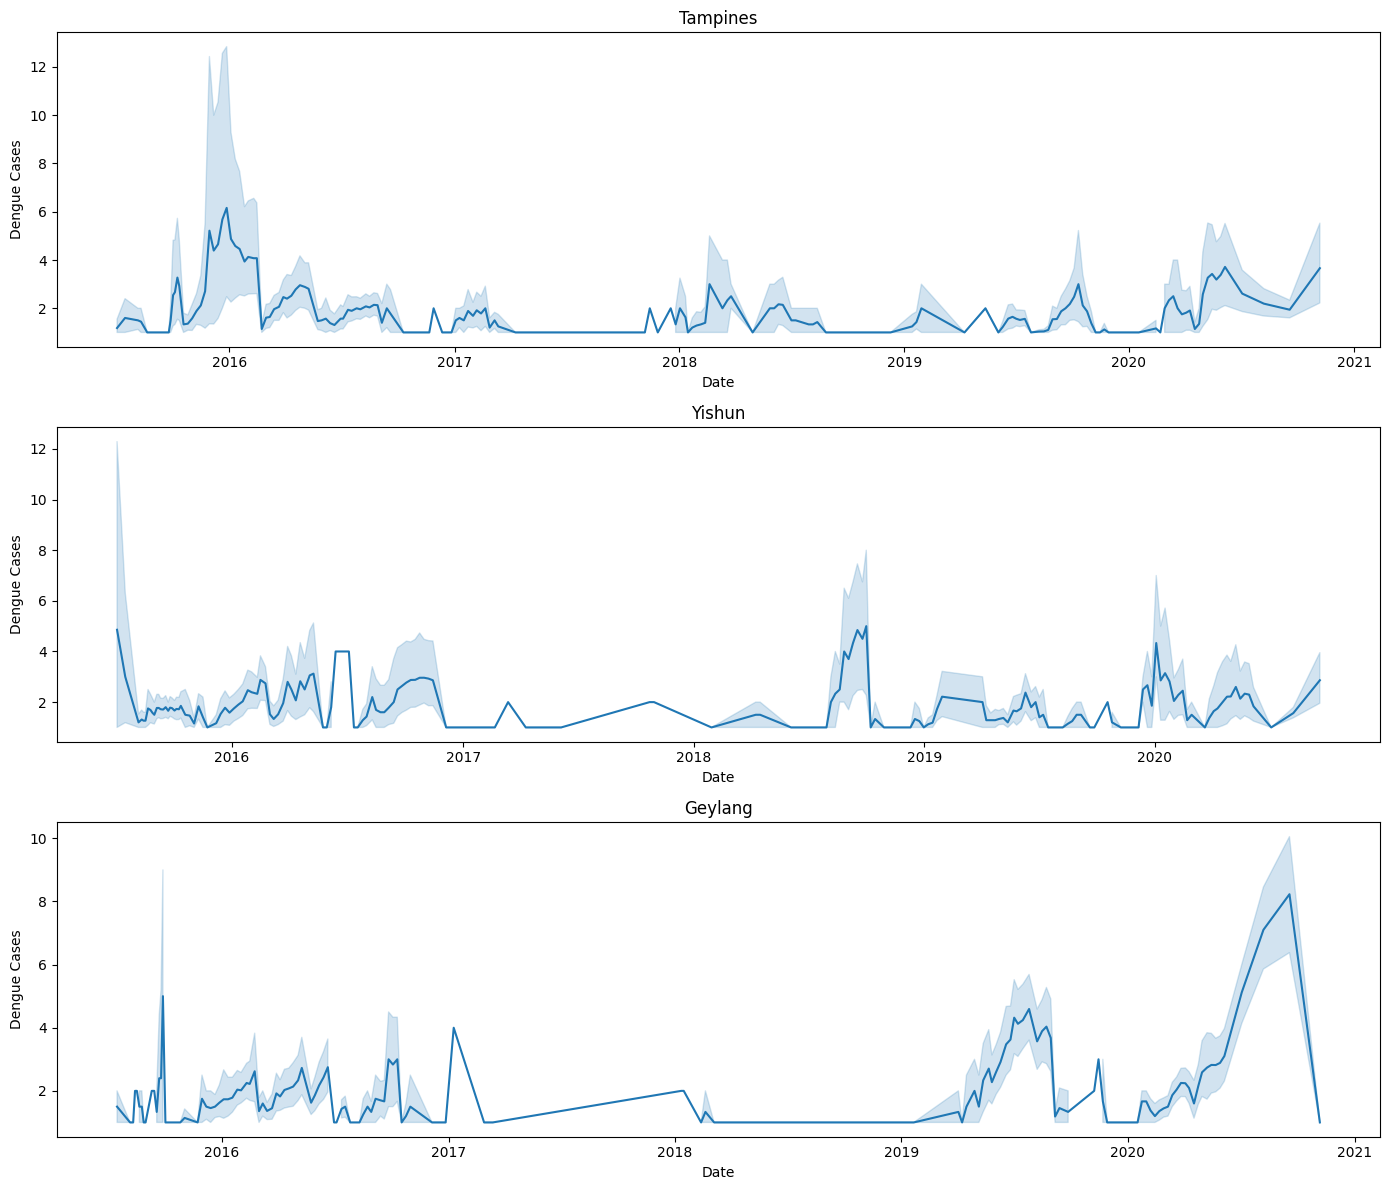

In [23]:
# Set the figure size and create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 12))

# Plotting the line graphs
sns.lineplot(data=master_df_tampines, x='date', y='dengue_cases', ax=axes[0])
sns.lineplot(data=master_df_yishun, x='date', y='dengue_cases', ax=axes[1])
sns.lineplot(data=master_df_geylang, x='date', y='dengue_cases', ax=axes[2])

# Formatting the subplots
axes[0].set_title('Tampines')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Dengue Cases')

axes[1].set_title('Yishun')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Dengue Cases')

axes[2].set_title('Geylang')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Dengue Cases')

# Adjust the spacing between subplots
plt.tight_layout()

plt.savefig('../data/output/cluster.png', transparent=True)

# Display the plot
plt.show()

**Save the cleaned and merged dataframes as csv files**

***(2) yearly master dataset (yearly_df)*** may not be used as it contains too many weather aggregates which can be obtained by manipulating the ***(3) monthly master dataset (monthly_df)*** directly. Its only unique information is the *yearly dengue column* that can be obtained from ***(1) yearly dengue dataset (df_dengue_yearly)***

In [54]:
# (1) Saving yearly dengue dataset
os.makedirs('../data/output', exist_ok=True)  
df_dengue_yearly.to_csv('../data/output/df_dengue_yearly.csv') 

# (2) Saving yearly master dataset 
os.makedirs('../data/output', exist_ok=True)  
df_year.to_csv('../data/output/yearly_df.csv')  

# (3) Saving monthly master dataset
os.makedirs('../data/output', exist_ok=True)  
df_month.to_csv('../data/output/monthly_df.csv')   

In [55]:
display(df_dengue_yearly.head())
display(df_year.head())
display(df_month.head())

,dengue_cases
date,
1966,162
1967,355
1968,158
1969,60
1970,32


,dengue_cases,max_monthly_max_rainfall,total_rday,total_rainfall,rh_mean,temp_mean
date,,,,,,


,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,wbt_mean,wbt_min,wbt_max,mean_rh,mean_temp,dengue
date,,,,,,,,,
1982-01-01,36.5,10.0,107.1,23.456048,21.3,25.6,81.2,25.9,NaN
1982-02-01,9.4,5.0,27.8,24.297619,22.4,26.8,79.5,27.1,NaN
1982-03-01,61.7,11.0,160.8,24.811559,22.4,27.4,82.3,27.2,NaN
1982-04-01,45.1,14.0,157.0,25.103750,22.2,27.6,85.9,27.0,NaN
1982-05-01,33.0,10.0,102.2,25.689651,22.7,28.1,83.2,28.0,NaN


### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.



|Feature|Type|Dataset|Description|
|---|---|---|---|
|maximum_rainfall_in_a_day|float|df_month|Highest daily rainfall in each month|
|no_of_rainy_days|float|df_month|Monthly number of rain days|
|total_rainfall|float|df_month|Total monthly rainfall in mm|
|wbt_mean|float|df_month|Mean monthly-wet-bulb-temperature|
|wbt_min|float|df_month|Mininum monthly-wet-bulb-temperature|
|wbt_max|float|df_month|Maximum monthly-wet-bulb-temperature|
|mean_rh|float|df_month|Mean relative humidity|
|mean_temp|float|df_month|Mean surface air temperature| 
|dengue|float|df_month|Total number of dengue cases in a month|

## Exploratory Data Analysis

The following steps are done to explore the data. 
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

**1. Summary Statistics**

In [56]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 488 entries, 1982-01-01 to 2022-08-01
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   maximum_rainfall_in_a_day  488 non-null    float64
 1   no_of_rainy_days           488 non-null    float64
 2   total_rainfall             488 non-null    float64
 3   wbt_mean                   488 non-null    float64
 4   wbt_min                    488 non-null    float64
 5   wbt_max                    488 non-null    float64
 6   mean_rh                    488 non-null    float64
 7   mean_temp                  488 non-null    float64
 8   dengue                     60 non-null     float64
dtypes: float64(9)
memory usage: 38.1 KB


In [57]:
df_month.describe()

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,wbt_mean,wbt_min,wbt_max,mean_rh,mean_temp,dengue
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,60.000000
mean,52.332172,14.061475,177.163730,25.258198,22.406352,27.472746,82.247541,27.678893,812.583333
std,35.746423,4.947394,113.916029,0.593979,0.663062,0.599431,3.413940,0.802195,683.323540
min,0.200000,1.000000,0.200000,23.391129,20.100000,25.600000,72.000000,25.400000,149.000000
25%,30.675000,11.000000,93.850000,24.925235,22.000000,27.100000,80.000000,27.100000,266.750000
50%,43.900000,14.000000,159.450000,25.290793,22.500000,27.500000,82.650000,27.700000,637.500000
75%,63.050000,18.000000,238.075000,25.645094,22.900000,27.900000,84.700000,28.300000,1090.250000
max,216.200000,27.000000,765.900000,26.913978,24.500000,29.300000,90.700000,29.500000,3090.000000


**Observation**
1. There is observably a high standard deviation for the number of dengue cases
2. The wbt_max, wbt_mean and mean_temp seems to have the lowest standard deviations

**2. Dictionary comprehension** using standard deviation function created in part 1

In [58]:
column_names = df_month.columns.tolist()

sd = {col: stdv(df_month[col]) for col in column_names}

print(sd)

{'maximum_rainfall_in_a_day': 35.70977918873312, 'no_of_rainy_days': 4.9423221913224085, 'total_rainfall': 113.79925170470057, 'wbt_mean': 0.5933699513911623, 'wbt_min': 0.6623825404333986, 'wbt_max': 0.5988163195958771, 'mean_rh': 3.4104399291902836, 'mean_temp': 0.8013725449868125, 'dengue': 677.6052511520912}


**3. Investigate trends in the data**

**Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?**

In [59]:
years = [1990, 2000, 2010, 2020]

for year in years:
    rainfall_year = df_month.loc[df_month.index.year == year, 'total_rainfall']
    max_rainfall_month = rainfall_year.idxmax().strftime('%B')
    min_rainfall_month = rainfall_year.idxmin().strftime('%B')
    print(f"For the year {year}:")
    print(f"Highest total rainfall month: {max_rainfall_month}")
    print(f"Lowest total rainfall month: {min_rainfall_month}")
    print()

For the year 1990:
Highest total rainfall month: September
Lowest total rainfall month: February

For the year 2000:
Highest total rainfall month: November
Lowest total rainfall month: September

For the year 2010:
Highest total rainfall month: July
Lowest total rainfall month: February

For the year 2020:
Highest total rainfall month: May
Lowest total rainfall month: February



Visualising usinng a barchart:

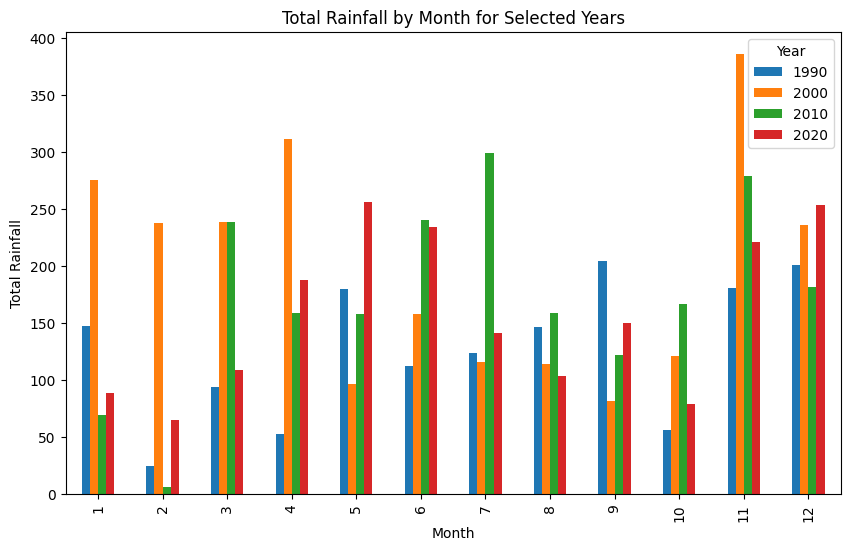

In [60]:
# Filter the DataFrame for the specific years (1990, 2000, 2010, 2020)
selected_years = [1990, 2000, 2010, 2020]
df_selected_years = df_month[df_month.index.year.isin(selected_years)]

# Group the total rainfall by month and year, and calculate the sum
total_rainfall_by_month_year = df_selected_years['total_rainfall'].groupby([df_selected_years.index.month, df_selected_years.index.year]).sum()

# Reshape the data to have each year as a separate column
total_rainfall_by_month_year = total_rainfall_by_month_year.unstack()

# Create a grouped bar plot
total_rainfall_by_month_year.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Month')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall by Month for Selected Years')

plt.legend(title='Year')

plt.show()


Now, visualising with line plot:

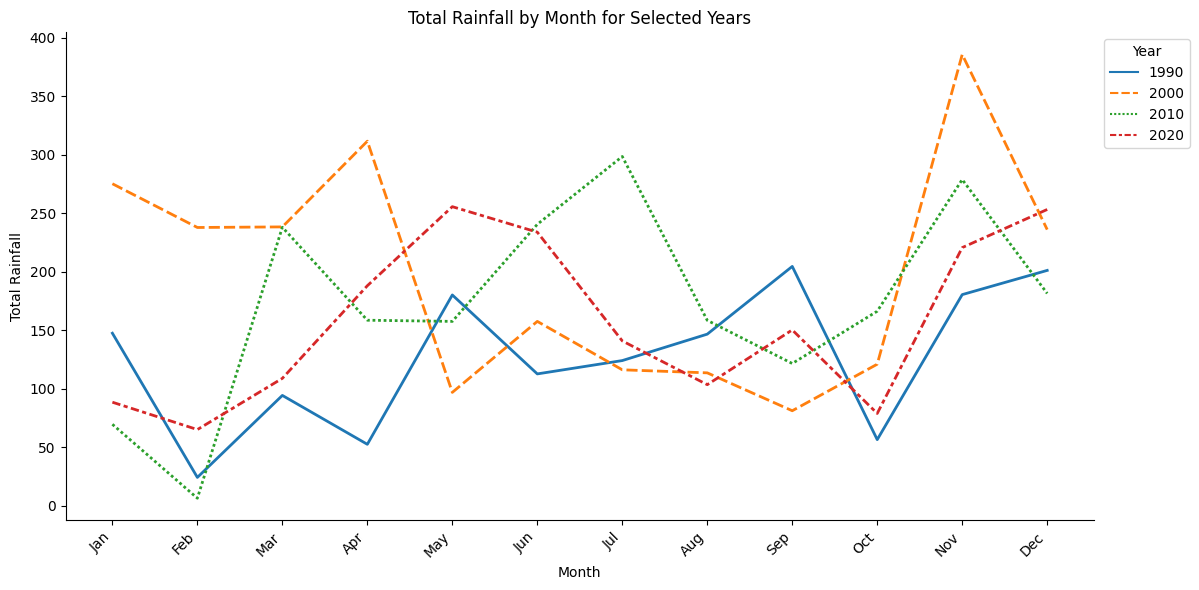

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# Filter the DataFrame for the specific years (1990, 2000, 2010, 2020)
selected_years = [1990, 2000, 2010, 2020]
df_selected_years = df_month[df_month.index.year.isin(selected_years)]

# Group the total rainfall by month and year, and calculate the sum
total_rainfall_by_month_year = df_selected_years['total_rainfall'].groupby([df_selected_years.index.month, df_selected_years.index.year]).sum()

# Reshape the data to have each year as a separate column
total_rainfall_by_month_year = total_rainfall_by_month_year.unstack()

# Create a line plot with adjusted line width
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=total_rainfall_by_month_year, linewidth=2, ax=ax)

# Convert the month numbers to month names in short form
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)], rotation=45, ha='right')

plt.xlabel('Month')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall by Month for Selected Years')

# Move the legend to the upper right corner outside the plot area
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.1, 1))

# Remove the top and right spines of the plot
sns.despine()

plt.tight_layout()
plt.show()



An overview of monthly rainfall trend of all years:

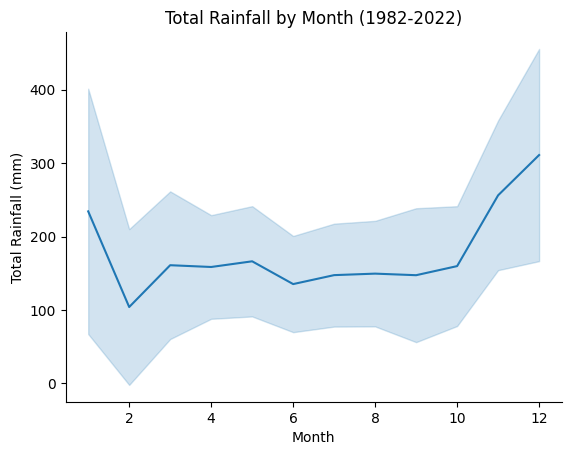

In [62]:
# Reset the index of the DataFrame
df_month_r = df_month.reset_index()

# Extract the month from the 'date' column
df_month_r['month'] = pd.to_datetime(df_month_r['date']).dt.month

# Create a line plot with error bars
sns.lineplot(data=df_month_r, x='month', y='total_rainfall', errorbar='sd')

plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.title('Total Rainfall by Month (1982-2022)')
sns.despine()
plt.show()

**Findings:**
- An obvious peak in rainfall volume is in November. 
- There are noticeable troughs in the trend in Feb and Oct

There are higher rainfall from November to January during the wet phase of Northeast Monsoon season, when the major tropical rainbelt (the Intertropical Convergence Zone ITCZ) is positioned near to us.  The driest month is February which is during the dry phase of the Northeast Monsoon when the rain-belt has moved further south to affect Java.
(Reference: http://www.weather.gov.sg/climate-climate-of-singapore/)

**Which year have the highest and lowest total rainfall in the date range of analysis?**

In [63]:
df_month['total_rainfall']

date
1982-01-01    107.1
1982-02-01     27.8
1982-03-01    160.8
1982-04-01    157.0
1982-05-01    102.2
              ...  
2022-04-01    239.6
2022-05-01    102.0
2022-06-01    211.8
2022-07-01    145.2
2022-08-01    141.4
Name: total_rainfall, Length: 488, dtype: float64

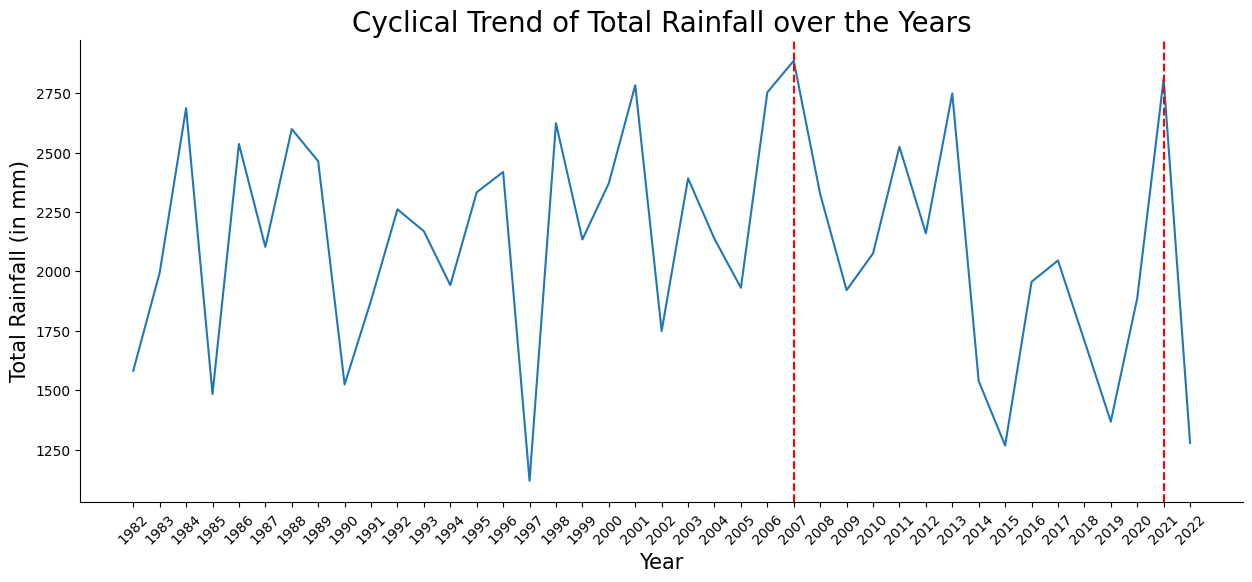

In [64]:
# Group the total rainfall by year and calculate the sum
total_rainfall_by_year = df_month['total_rainfall'].groupby(df_month.index.year).sum()

# Create a wider figure and adjust the size as per your preference
plt.figure(figsize=(15, 6))

# Create a line plot using seaborn
sns.lineplot(x=total_rainfall_by_year.index, y=total_rainfall_by_year.values)

plt.xlabel('Year', fontsize=15)
plt.ylabel('Total Rainfall (in mm)', fontsize=15)
plt.title('Cyclical Trend of Total Rainfall over the Years', fontsize=20)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Specify x-axis ticks and labels for every year
plt.xticks(total_rainfall_by_year.index)

# Find the highest peaks in the years 2021 and 2007
highest_peaks = total_rainfall_by_year.nlargest(2)

# Draw dotted guiding lines up to the highest peaks in 2021 and 2007
for year in highest_peaks.index:
    plt.axvline(x=year, color='r', linestyle='--')
sns.despine()
plt.show()


In [65]:
max_rainfall_year = df_month['total_rainfall'].groupby(df_month.index.year).sum().idxmax()
min_rainfall_year = df_month['total_rainfall'].groupby(df_month.index.year).sum().idxmin()

print(f"Highest total rainfall year in the date range: {max_rainfall_year}")
print(f"Lowest total rainfall year in the date range: {min_rainfall_year}")


Highest total rainfall year in the date range: 2007
Lowest total rainfall year in the date range: 1997


Findings:
- The La Nina climate phenomenon, which brings more rain over equatorial South-east Asia, had been in effect for 2021 and 2007. 2021 was Singapore's second-wettest year on record due to La Nina climate phenomenon. 
- Troughs like the one in 1997 was attributed to the El Nino weather phenomenon. El Nino a pile-up of warm water in the eastern Pacific Ocean can alter the direction of cooling and moisture-bearing winds in Asia. The phenomenon occurs every two to seven years, and usually lasts for about 18 months.  (Reference: https://www.tehrantimes.com/news/5228/1997-Singapore-s-Hottest-Driest-Year)

**Taking a look at yearly dengue data:**


In [66]:
df_dengue_yearly_1982 = df_dengue_yearly.loc[1982:,:]

fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=df_dengue_yearly_1982, x=df_dengue_yearly_1982.index, y='dengue_cases', ax=ax, color='maroon')

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

sns.despine(left=True, top=True)

plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.title('Yearly Dengue Cases')

plt.savefig('../data/output/yearly_dengue_cases.png', transparent=True)

plt.show()


TypeError: cannot do slice indexing on Index with these indexers [1982] of type int

The spike in cases has been increasing. 

The higher temperatures observed in 2019 and 2020:
Dengue transmission in or near homes is another critical factor for dengue outbreak. The increase in work-from-home as part of COVID-19 safe management measures in 2020 increased the risk of bites by dengue-carrying Aedes species mosquitoes, which more commonly occurred at home. Increase in number of indoor larvae breeding also contributed to the surge in dengue cases
https://www.ncid.sg/Health-Professionals/Articles/Pages/Epidemic-Dengue-in-Singapore-During-COVID-19-Pandemic.aspx

The drop in cases in 2021 may be a blip as the surge in Covid-19 infections – which cause symptoms similar to those of dengue, such as fever, muscle aches, nausea and fatigue – may have led to dengue cases going undetected and under-reported.
https://www.duke-nus.edu.sg/allnews/singapore-dengue-numbers-may-swell-again-(straits-times-premium)

TypeError: '>=' not supported between instances of 'str' and 'int'

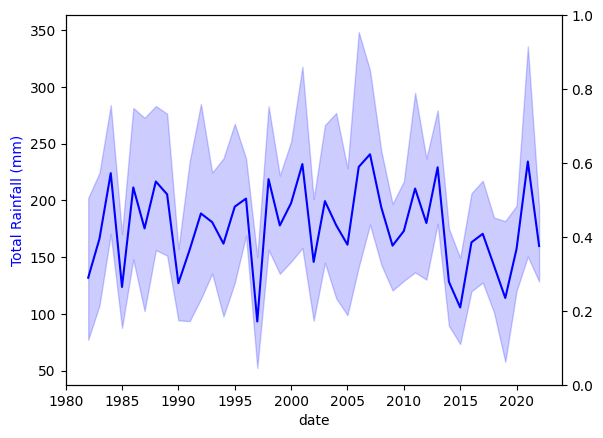

In [67]:
# Create subplots
fig, ax1 = plt.subplots()

# Plot total rainfall over the years
sns.lineplot(data=df_month, x=df_month.index.year, y='total_rainfall', ax=ax1, color='blue')
ax1.set_ylabel('Total Rainfall (mm)', color='blue')

# Create a second y-axis for dengue cases
ax2 = ax1.twinx()

# Filter the df_dengue_yearly for data from 1982 onwards
df_dengue_filtered = df_dengue_yearly[df_dengue_yearly.index >= 1982]

# Plot dengue fever cases over the years
sns.lineplot(data=df_dengue_filtered, x=df_dengue_filtered.index, y='dengue_cases', ax=ax2, color='red')
ax2.set_ylabel('Dengue Cases', color='red')

# Set x-axis label and title
plt.xlabel('Year')
plt.title('Total Rainfall and Dengue Cases over the Years')

plt.show()


**Combining total rainfall data with dengue cases data:**

In [ ]:
yearly_total_rainfall

In [ ]:
# Calculate yearly total rainfall
yearly_total_rainfall = df_month['total_rainfall'].groupby(df_month.index.year).sum()

# Create subplots
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the figure size as desired

# Define seaborn color palette
colors = sns.color_palette("Set1")

# Add subtle gridlines in the background
ax1.grid(color='lightgray', linestyle='--')
ax2.grid(color='lightgray', linestyle='--')

# Plot total rainfall over the years
sns.lineplot(data=yearly_total_rainfall, ax=ax1, color=colors[1], linewidth=2)  # Increase line width
ax1.set_ylabel('Total Rainfall (mm)', color=colors[1])
ax1.tick_params(axis='y', labelcolor=colors[1])  # Set y-axis tick color

# Create a second y-axis for dengue cases
ax2 = ax1.twinx()

# Filter the df_dengue_yearly for data from 1982 onwards
df_dengue_filtered = df_dengue_yearly[df_dengue_yearly.index >= 1982]

# Plot dengue fever cases over the years
sns.lineplot(data=df_dengue_filtered, x=df_dengue_filtered.index, y='dengue_cases', ax=ax2, color=colors[0], linewidth=2)  # Increase line width
ax2.set_ylabel('Dengue Cases', color=colors[0])
ax2.tick_params(axis='y', labelcolor=colors[0])  # Set y-axis tick color

# Highlight important parts with shading
ax1.axvspan(1991.5, 1992.5, facecolor='green', alpha=0.2)
ax1.axvspan(1997.5, 1998.5, facecolor='green', alpha=0.2)
ax1.axvspan(2006.5, 2007.5, facecolor='green', alpha=0.2)
ax1.axvspan(2012.5, 2013.5, facecolor='green', alpha=0.2)
ax1.axvspan(2008.5, 2009.5, facecolor='maroon', alpha=0.2)
ax1.axvspan(2011.5, 2012.5, facecolor='maroon', alpha=0.2)
ax1.axvspan(2014.5, 2015.5, facecolor='maroon', alpha=0.2)

# Set x-axis label and title
ax1.set_xlabel('Year')  # Use set_xlabel instead of xlabel to set x-axis label for the first axis
plt.title('Total Rainfall and Dengue Cases over the Years')

# Adjust plot layout and spacing
plt.tight_layout()

plt.show()


**Findings:**
Most dengue peaks are associated with peaks in total rainfall

Zooming into monthly dengue data (only 2014-2018 available)

ValueError: Could not interpret value `total_rainfall` for parameter `y`

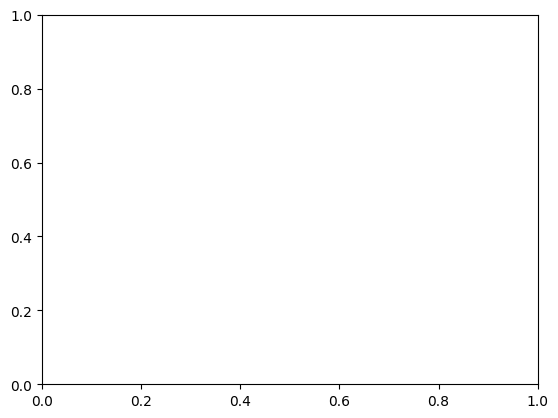

In [68]:
# Create subplots
fig, ax1 = plt.subplots()

# Plot total rainfall on the left y-axis
sns.lineplot(data=df, x=df.index, y='total_rainfall', ax=ax1, color='blue')
ax1.set_ylabel('Total Rainfall', color='blue')

# Create a second y-axis for dengue cases
ax2 = ax1.twinx()

# Plot dengue cases on the right y-axis
sns.lineplot(data=df, x='date', y='dengue_cases', ax=ax2, color='maroon')
ax2.set_ylabel('Dengue Cases', color='red')

plt.xlabel('Month')
plt.title('Total Rainfall and Dengue Cases')

plt.show()


In [ ]:
# Reset the index of the DataFrame
df_month_r = df_month[~df_month['dengue_cases'].isnull()].reset_index()

# Extract the month from the 'date' column
df_month_r['date'] = pd.to_datetime(df_month_r['date']).dt.month

# Create subplots
fig, ax1 = plt.subplots()

# Plot number of rainy days on the left y-axis
sns.lineplot(data=df_month_r, x='date', y='total_rainfall', errorbar='sd', ax=ax1, color='blue')
ax1.set_ylabel('Total Rainfall (in mm)', color='blue')

# Create a second y-axis for dengue cases
ax2 = ax1.twinx()

# Plot dengue cases on the right y-axis
sns.lineplot(data=df_month_r, x='date', y='dengue_cases', errorbar='sd', ax=ax2, color='maroon')
ax2.set_ylabel('Dengue Cases', color='red')

ax1.set_xlabel('Month')  # Set x-axis label
plt.title('Total Rainfall and Dengue Cases by Month (2014-2018)')
sns.despine()
plt.show()


**Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?**

In [ ]:
for year in years:
    rainy_days_year = df_month.loc[df_month.index.year == year, 'no_of_rainy_days']
    max_rainy_days_month = rainy_days_year.idxmax().strftime('%B')
    min_rainy_days_month = rainy_days_year.idxmin().strftime('%B')
    print(f"For the year {year}:")
    print(f"Highest number of rainy days month: {max_rainy_days_month}")
    print(f"Lowest number of rainy days month: {min_rainy_days_month}")
    print()

Findings:
- The rainy season is usually near the 4th quarter of the year, but has gotten earlier in the past decade.
- The dry season is usually in the 1st quarter of the year.
- The dry and rainy season are usually 6 months apart.
- These seasons generally coincides with the periods with highest/lowest rainfall as investigated earlier on.

In [ ]:
# Reset the index of the DataFrame
df_month_r = df_month[~df_month['dengue_cases'].isnull()].reset_index()

# Extract the month from the 'date' column
df_month_r['month'] = pd.to_datetime(df_month_r['date']).dt.month

# Map month numbers to month names
df_month_r['month'] = df_month_r['month'].map(lambda x: calendar.month_abbr[x])

# Create subplots
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot number of rainy days on the left y-axis
sns.lineplot(data=df_month_r, x='month', y='no_of_rainy_days', errorbar='sd', ax=ax1, color='blue')
ax1.set_ylabel('Number of Rainy Days', color='blue')

# Remove top, left, and right borders
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.set_xlabel('Month')  # Set x-axis label
plt.title('Total Number of Rainy Days by Month (2014-2018)')


plt.savefig('../data/output/monthly_rainy_days.png', transparent=True)
plt.show()


In [ ]:
# Reset the index of the DataFrame
df_month_r = df_month[~df_month['dengue_cases'].isnull()].reset_index()

# Extract the month from the 'date' column
df_month_r['month'] = pd.to_datetime(df_month_r['date']).dt.month

# Map month numbers to month names
df_month_r['month'] = df_month_r['month'].map(lambda x: calendar.month_abbr[x])

# Create subplots
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot number of rainy days on the left y-axis
sns.lineplot(data=df_month_r, x='month', y='no_of_rainy_days', errorbar='sd', ax=ax1, color='blue')
ax1.set_ylabel('Number of Rainy Days', color='blue')

# Create a second y-axis for dengue cases
ax2 = ax1.twinx()

# Plot dengue cases on the right y-axis
sns.lineplot(data=df_month_r, x='month', y='dengue_cases', errorbar='sd', ax=ax2, color='red')
ax2.set_ylabel('Dengue Cases', color='red')

# Remove top, left, and right borders
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.set_xlabel('Month')  # Set x-axis label
plt.title('Total Number of Rainy Days and Dengue Cases by Month (2014-2018)')

plt.savefig('../data/output/monthly_rainy_days_and_dengue.png', transparent=True)

plt.show()




In [ ]:
df_month_r = df_month[(df_month.index >= '2013-10-01') & (df_month.index <= '2018-12-01')].reset_index()

# Shift the dengue cases timeline by 2 months earlier
df_month_r['date_lag_2m'] = pd.to_datetime(df_month_r['date']) - pd.DateOffset(months=2)

# Extract the month from the shifted 'date' column
df_month_r['date'] = df_month_r['date'].dt.month
df_month_r['date_lag_2m'] = df_month_r['date_lag_2m'].dt.month

# Create subplots
fig, ax1 = plt.subplots()

# Plot number of rainy days on the left y-axis
sns.lineplot(data=df_month_r, x='date', y='no_of_rainy_days', errorbar='sd', ax=ax1, color='blue')
ax1.set_ylabel('Number of Rainy Days', color='blue')

# Create a second y-axis for dengue cases
ax2 = ax1.twinx()

# Plot dengue cases on the right y-axis
sns.lineplot(data=df_month_r, x='date_lag_2m', y='dengue_cases', errorbar='sd', ax=ax2, color='red')
ax2.set_ylabel('Dengue Cases', color='red')

plt.xlabel('Month')
plt.title('Number of Rainy Days and Shifted Dengue Cases by Month (2014-2018)')
sns.despine()
plt.show()


In [ ]:
# Reset the index of the DataFrame
df_month_r = df_month[~df_month['dengue_cases'].isnull()].reset_index()

# Extract the month from the 'date' column
df_month_r['month'] = pd.to_datetime(df_month_r['date']).dt.month

# Map month numbers to month names
df_month_r['month'] = df_month_r['month'].map(lambda x: calendar.month_abbr[x])

# Create a lagged version of the dengue cases column shifted by 2 months
df_month_r['lagged_dengue_cases'] = df_month_r['dengue_cases'].shift(-2)

# Create subplots
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot number of rainy days on the left y-axis
sns.lineplot(data=df_month_r, x='month', y='no_of_rainy_days', errorbar='sd', ax=ax1, color='blue')
ax1.set_ylabel('Number of Rainy Days', color='blue')

# Create a second y-axis for lagged dengue cases
ax2 = ax1.twinx()

# Plot lagged dengue cases on the right y-axis
sns.lineplot(data=df_month_r, x='month', y='lagged_dengue_cases', errorbar='sd', ax=ax2, color='red')
ax2.set_ylabel('Dengue Cases', color='red')

# Remove top, left, and right borders
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.set_xlabel('Month')  # Set x-axis label
plt.title('Total Number of Rainy Days and Lagged Dengue Cases by Month (2014-2018)')

# Calculate the correlation coefficient between rainy days and lagged dengue cases
correlation_coefficient = df_month_r['no_of_rainy_days'].corr(df_month_r['lagged_dengue_cases'])

# Display the correlation coefficient in the plot
plt.text(0.05, 0.9, f'Correlation Coefficient: {correlation_coefficient:.2f}', transform=ax1.transAxes)

plt.savefig('../data/output/monthly_rainy_days_and_lagged_dengue.png', transparent=True)

plt.show()


**Which year have the highest and lowest number of rainy days in the date range of analysis?**

In [ ]:
max_rainy_days_year = df_month['no_of_rainy_days'].groupby(df_month.index.year).sum().idxmax()
min_rainy_days_year = df_month['no_of_rainy_days'].groupby(df_month.index.year).sum().idxmin()

print(f"Highest number of rainy days year in the date range: {max_rainy_days_year}")
print(f"Lowest number of rainy days year in the date range: {min_rainy_days_year}")

In [ ]:
# Group the total rainfall by year and calculate the sum
rainy_days = df_month['no_of_rainy_days'].groupby(df_month.index.year).sum()

# Create a wider figure and adjust the size as per your preference
plt.figure(figsize=(15, 6))

# Create a line plot using seaborn
sns.lineplot(x=rainy_days.index, y=rainy_days.values)

plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Rainy Days', fontsize=15)
plt.title('Trend of Number of Rainy Days over the Years', fontsize=20)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Specify x-axis ticks and labels for every year
plt.xticks(rainy_days.index)

# Find the highest peaks in the years 2021 and 2007
highest_peaks = rainy_days.nlargest(2)


sns.despine()
plt.show()


In [ ]:
# Calculate yearly total number of rainy days
yearly_total_days = df_month['no_of_rainy_days'].groupby(df_month.index.year).sum()

# Create subplots
fig, ax1 = plt.subplots(figsize=(12, 6))  # Adjust the figure size as desired

# Define seaborn color palette
colors = sns.color_palette("Set1")

# Add subtle gridlines in the background
ax1.grid(color='lightgray', linestyle='--')

# Plot total rainfall over the years
sns.lineplot(data=yearly_total_days, ax=ax1, color=colors[1], linewidth=2)  # Increase line width
ax1.set_ylabel('Number of Rainy Days', color=colors[1])
ax1.tick_params(axis='y', labelcolor=colors[1])  # Set y-axis tick color


# Remove top, left, and right borders
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Set x-axis label and title
ax1.set_xlabel('Year')  # Use set_xlabel instead of xlabel to set x-axis label for the first axis
plt.title('Number of Rainy Days and Dengue Cases over the Years')

# Adjust plot layout and spacing
plt.tight_layout()

# Save the figure with a transparent background
plt.savefig('../data/output/yearly_rainy_days.png', transparent=True)

plt.show()

Findings:
    - Cyclical nature similar to what the total rainfall trend.

In [ ]:
# Calculate yearly total number of rainy days
yearly_total_days = df_month['no_of_rainy_days'].groupby(df_month.index.year).sum()

# Create subplots with exact dimensions
fig, ax = plt.subplots(figsize=(12, 5))  # Set the desired width and height

# Define seaborn color palette
colors = sns.color_palette("Set1")

# Add subtle gridlines in the background
ax.grid(color='lightgray', linestyle='--')

# Plot total rainfall over the years
sns.lineplot(data=yearly_total_days, ax=ax, color=colors[1], linewidth=2)  # Increase line width
ax.set_ylabel('Number of Rainy Days', color=colors[1])
ax.tick_params(axis='y', labelcolor=colors[1])  # Set y-axis tick color

# Remove top, left, and right borders
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis label and title
ax.set_xlabel('Year')
plt.title('Number of Rainy Days over the Years')

# Adjust plot layout and spacing
plt.tight_layout()

# Save the figure with a transparent background
plt.savefig('../data/output/yearly_rainy_days.png', transparent=True)

plt.show()


In [ ]:
# Calculate yearly total number of rainy days
yearly_total_days = df_month['no_of_rainy_days'].groupby(df_month.index.year).sum()

# Create subplots
fig, ax1 = plt.subplots(figsize=(12, 6))  # Adjust the figure size as desired

# Define seaborn color palette
colors = sns.color_palette("Set1")

# Add subtle gridlines in the background
ax1.grid(color='lightgray', linestyle='--')
ax2.grid(color='lightgray', linestyle='--')

# Plot total rainfall over the years
sns.lineplot(data=yearly_total_days, ax=ax1, color=colors[1], linewidth=2)  # Increase line width
ax1.set_ylabel('Number of Rainy Days', color=colors[1])
ax1.tick_params(axis='y', labelcolor=colors[1])  # Set y-axis tick color

# Create a second y-axis for dengue cases
ax2 = ax1.twinx()

# Filter the df_dengue_yearly for data from 1982 onwards
df_dengue_filtered = df_dengue_yearly[df_dengue_yearly.index >= 1982]

# Plot dengue fever cases over the years
sns.lineplot(data=df_dengue_filtered, x=df_dengue_filtered.index, y='dengue_cases', ax=ax2, color=colors[0], linewidth=2)  # Increase line width
ax2.set_ylabel('Dengue Cases', color=colors[0])
ax2.tick_params(axis='y', labelcolor=colors[0])  # Set y-axis tick color

# Remove top, left, and right borders
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Set x-axis label and title
ax1.set_xlabel('Year')  # Use set_xlabel instead of xlabel to set x-axis label for the first axis
plt.title('Number of Rainy Days and Dengue Cases over the Years')

# Adjust plot layout and spacing
plt.tight_layout()

# Save the figure with a transparent background
plt.savefig('../data/output/yearly_rainy_days_and_dengue_cases.png', transparent=True)

plt.show()

In [ ]:
df_dengue_filtered.index

**Are there any outliers months in the dataset?**

Using the z-score method, a month is considered as an outlier if its total rainfall is more than three standard deviations away from the mean



In [ ]:
# Checking the 2 key datasets: total_rainfall and no_of_rainy_days

outlier_threshold = 3

# Total _rainfall
z_scores = (df_month['total_rainfall'] - df_month['total_rainfall'].mean()) / df_month['total_rainfall'].std()
# Using masking to show rows of outlier months
outliers = df_month[z_scores.abs() > outlier_threshold]
# Sorting the column in descending order
# outliers.sort_values(by=['total_rainfall'], ascending=False, inplace=True)
print(f"Mean: {df_month['total_rainfall'].mean()}")
display(outliers[['total_rainfall']])

# no_of_rainy_days
z_scores_days = (df_month['no_of_rainy_days'] - df_month['no_of_rainy_days'].mean()) / df_month['no_of_rainy_days'].std()
# Using masking to show rows of outlier months
outliers_days = df_month[z_scores.abs() > outlier_threshold]
# Sorting the column in descending order
# outliers_days.sort_values(by=['no_of_rainy_days'], ascending=False, inplace=True)
print(f"Mean: {df_month['no_of_rainy_days'].mean()}")
display(outliers_days[['no_of_rainy_days']])

Findings:
- The outliers are usually abnormal high amounts of rainfall/number of rainy days in December and January. This could be attributed to the extremely high intensity of The Northeast Monsoon that usually occurs from December to early March, which brings a spike in total rainfall in that month.
- As for the years, similar observations can be made from the line plots above, and is likely attributed to the La Nina phenomenum.

## Visualize the Data


**Correlations**

In [ ]:
# Correlation matric is sorted based on 
display(df_year.corr().sort_values(by='dengue_cases',ascending=False));
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_year.corr().sort_values(by='dengue_cases',ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Yearly Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

save_results_to = '../data/output/'
plt.savefig(save_results_to + 'heatmap_yearly.png', dpi = 300, bbox_inches='tight', transparent=True)

# plt.savefig(result_dir + sample_file_name, dpi=300, bbox_inches='tight')

# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

Intepretation: Mean temperature and relative humidity have a much greater correlation with dengue cases. Combined with the line plot we have, we can see that even though there is a low correlation between total rainy days and dengue cases, most spikes in dengue cases do coincide with spikes in total rainy days. Hence, for a yearly basis, it is useful to take mean temperature  and mean relative humidity into consideration.

In [ ]:
# Correlation matric is sorted based on 
display(df_month.corr().sort_values(by='dengue_cases',ascending=False));
plt.figure(figsize=(16, 6))
df_month_filtered = df_month[~df_month.isnull()]
heatmap = sns.heatmap(df_month_filtered.corr().sort_values(by='dengue_cases',ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Monthly Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

save_results_to = '../data/output/'
plt.savefig(save_results_to + 'heatmap_monthly.png', dpi = 300, bbox_inches='tight', transparent=True)

# plt.savefig(result_dir + sample_file_name, dpi=300, bbox_inches='tight')

# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

In [ ]:
plt.figure(figsize=(1, 6))
df_month_filtered = df_month[~df_month.isnull()]
correlation_values = df_month_filtered.corr()['dengue_cases'].sort_values(ascending=False)
heatmap = sns.heatmap(pd.DataFrame(correlation_values), annot=True, cmap='BrBG', cbar=True, vmin=-1, vmax=1)
heatmap.set_title('Monthly Correlation with Dengue Cases', fontdict={'fontsize': 18}, pad=12)
save_results_to = '../data/output/'
plt.savefig(save_results_to + 'heatmap_monthly_dengue.png', dpi = 300, bbox_inches='tight', transparent=True)
plt.show()



Intepretation: For monthly correlation, total rainy days has a comparative high corelation with number of dengue cases. This was why I have used this rain data for analysis with dengue cases as well. Considering the lagged effects between rainfall and dengue fever outbreaks, this correlation coefficient may potentially be higher upon doing a lagged analysis.

In [ ]:
sns.pairplot(df_year)

Other relevant visualisations have been generated under EDA.

## Conclusions and Recommendations

In conclusion, some recommendations to be proposed:
- Resource allocation: Use rainfall forecast (esp 2 month-lag) to optimise prevention strategy and medical resources
- Data-sharing: Historical dengue cases data not provided after 2019. Not easy to obtain cluster data well.
- Accelerate Project Wolbachia to area with greater variations in rainfall days.